In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [3]:
raw_data = pd.read_csv('heart.csv')

raw_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


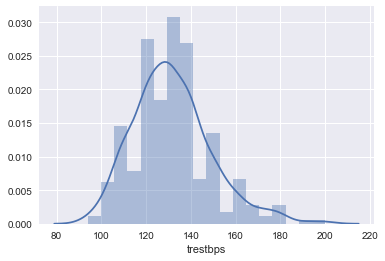

In [17]:
sns.distplot(raw_data['trestbps'])

In [33]:
y = raw_data['target']
x1 = raw_data['trestbps']

In [34]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.678589
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                  303
Model:                          Logit   Df Residuals:                      301
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 May 2019   Pseudo R-squ.:                 0.01536
Time:                        14:17:13   Log-Likelihood:                -205.61
converged:                       True   LL-Null:                       -208.82
                                        LLR p-value:                   0.01133
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4093      0.904      2.665      0.008       0.637       4.181
trestbps      -0.0169      0.007     -2.489      0.013      -0.030      -0.004
==============================================================================
"""

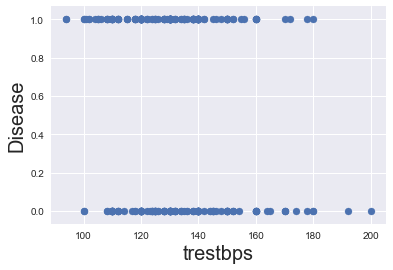

In [36]:
plt.scatter(x1,y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('trestbps', fontsize = 20)
plt.ylabel('Disease', fontsize = 20)
plt.show()

In [100]:
estimators=['age','sex','chol','trestbps','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

X1_all = raw_data[estimators]
y = raw_data['target']

In [101]:
X_all = sm.add_constant(X1_all)
reg_logit = sm.Logit(y,X_all)
results_logit = reg_logit.fit()
results_logit.summary2()

Optimization terminated successfully.
         Current function value: 0.389740
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.434     
Dependent Variable: target           AIC:              262.1825  
Date:               2019-05-28 14:29 BIC:              310.4611  
No. Observations:   303              Log-Likelihood:   -118.09   
Df Model:           12               LL-Null:          -208.82   
Df Residuals:       290              LLR p-value:      2.1443e-32
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
const          2.8157    2.3889   1.1787  0.2385  -1.8664   7.4978
age           -0.0019    0.0216  -0.0899  0.9283  -0.0442   0.0403
sex           -1.4974    0.4205  -3.5612  0.0004  -2.3216  -0.6733
chol          -0.0053    0.0035  -1.5104  0.1309  -0.0121   0.0016
trestbps      -0.0142    0.0097  -1.4568  0.1452  -0.0332   0.0049
fbs            0.3723    0.4634   0.8035  0.4217  -0.5359   1.2806
restecg        0.3685    0.3213   1.1469  0.2514  -0.2612   0.9982
thalach        0.0281    0.0093   3.0361  0.0024   0.0100   0.0462
exang         -1.4573    0.3695  -3.9437  0.0001  -2.1816  -0.7330
oldpeak       -0.4060    0.1948  -2.0846  0.0371  -0.7878  -0.0243
slope          0.4768    0.3286   1.4510  0.1468  -0.1672   1.1208
ca            -0.7808    0.1776  -4.3956  0.0000  -1.1290  -0.4327
thal          -0.8650    0.2710  -3.1919  0.0014  -1.3961  -0.3339
=================================================================

"""

In [102]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm , accuracy

In [103]:
confusion_matrix(X_all,y,results_logit)

(array([[108.,  30.],
        [ 24., 141.]]), 0.8217821782178217)

In [104]:
corr = 108 + 141
wrg = 30 + 24
total = corr + wrg

acc = corr / total * 100

acc

82.17821782178217